# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

# План работы

 - Установка и импорт необходимых библиотек;
 - Первичный осмотр данных;
 - Подготовить данные и обучить модель;
 - Получить предсказания запаса нефти по каждому региону;
 - Составить функцию расчета прибыли и вероятности убытков и применить её к каждому региону;
 - Итоговые выводы.
 

# Импорт библиотек

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Загрузка и осмотр данных

### Загрузка данных

In [2]:
try:
    df_1 = pd.read_csv('/datasets/geo_data_0.csv')
    df_2 = pd.read_csv('/datasets/geo_data_1.csv')
    df_3 = pd.read_csv('/datasets/geo_data_2.csv')
except (FileNotFoundError, OSError) as e:
    try:
        df_1 = pd.read_csv("C://Users/rdl_b/OneDrive/Рабочий стол/python/Yandex Practicum/Загрузка проектов/Проект 9/geo_data_0.csv")
        df_2 = pd.read_csv("C://Users/rdl_b/OneDrive/Рабочий стол/python/Yandex Practicum/Загрузка проектов/Проект 9/geo_data_1.csv")
        df_3 = pd.read_csv("C://Users/rdl_b/OneDrive/Рабочий стол/python/Yandex Practicum/Загрузка проектов/Проект 9/geo_data_2.csv")
    except (FileNotFoundError, OSError):
        print("Ошибка: не удалось загрузить данные")
else:
    print("Данные успешно загружены")

Данные успешно загружены


### Осмотр данных

In [3]:
#Функция для ознакомления
for name, df in [('df_1', df_1), ('df_2', df_2), ('df_3', df_3)]:
    print()
    print(f"Выводим инфо о дф {name}:")
    df.info()
    print()
    print(f"Количество дубликатов в дф {name}:", df.duplicated().sum())
    print()
    print(f"Выводим 5 строк дф {name}:")
    display(df.head())


Выводим инфо о дф df_1:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB

Количество дубликатов в дф df_1: 0

Выводим 5 строк дф df_1:


,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647



Выводим инфо о дф df_2:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB

Количество дубликатов в дф df_2: 0

Выводим 5 строк дф df_2:


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305



Выводим инфо о дф df_3:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB

Количество дубликатов в дф df_3: 0

Выводим 5 строк дф df_3:


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


Посмотрим, как распределены данные с помощью метода describe():

In [4]:
for name, df in [('df_1', df_1), ('df_2', df_2), ('df_3', df_3)]:
    print(f"Выводим данные распределения о дф {name}:")
    display(df.describe())

Выводим данные распределения о дф df_1:


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


Выводим данные распределения о дф df_2:


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


Выводим данные распределения о дф df_3:


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


### Вывод по осмотру данных

После загрузки данных и их осмотра установлено:
  - Пропусков и дубликатов в данных нет;
  - Все типы данных определены верно;
  - Аномальных значений не выявлено.
  
Данные поступили достаточно "чистыми", в предобработке не нуждаются.

## Подготовка данных, обучение и проверка модели

Подготовим данные:

In [5]:
df_1.drop(["id"], axis=1, inplace=True)
df_2.drop(["id"], axis=1, inplace=True)
df_3.drop(["id"], axis=1, inplace=True)

Проверим:

In [6]:
df_1.head()
df_2.head()
df_3.head()

,f0,f1,f2,product
0,-1.146987,0.963328,-0.828965,27.758673
1,0.262778,0.269839,-2.530187,56.069697
2,0.194587,0.289035,-5.586433,62.871910
3,2.236060,-0.553760,0.930038,114.572842
4,-0.515993,1.716266,5.899011,149.600746


In [7]:
df_2.head()

,f0,f1,f2,product
0,-15.001348,-8.276000,-0.005876,3.179103
1,14.272088,-3.475083,0.999183,26.953261
2,6.263187,-5.948386,5.001160,134.766305
3,-13.081196,-11.506057,4.999415,137.945408
4,12.702195,-8.147433,5.004363,134.766305


In [8]:
df_3.head()

,f0,f1,f2,product
0,-1.146987,0.963328,-0.828965,27.758673
1,0.262778,0.269839,-2.530187,56.069697
2,0.194587,0.289035,-5.586433,62.871910
3,2.236060,-0.553760,0.930038,114.572842
4,-0.515993,1.716266,5.899011,149.600746


### Разбиение на выборки

In [9]:
def split_df(data_split):
    features = data_split.drop("product",axis=1)
    target = data_split["product"]
    
    train_features, valid_features, train_target, valid_target = train_test_split(features, target, 
                                                                                  test_size=0.25, random_state=42)
    
    return train_features, valid_features, train_target, valid_target

In [10]:
train_features_1, valid_features_1, train_target_1, valid_target_1 = split_df(df_1)

In [11]:
print(f'Размер исходника: {df_1.shape}')
print(f'Размер дф с признаками обучающей выборки: {train_features_1.shape}')
print(f'Размер дф с таргетом обучающий: {train_features_1.shape[0]}')
print(f'Размер дф с признаками валидационной выборки: {valid_features_1.shape}')
print(f'Размер дф с таргетом валидационной выборки: {valid_target_1.shape[0]}')

Размер исходника: (100000, 4)
Размер дф с признаками обучающей выборки: (75000, 3)
Размер дф с таргетом обучающий: 75000
Размер дф с признаками валидационной выборки: (25000, 3)
Размер дф с таргетом валидационной выборки: 25000


In [12]:
train_features_2, valid_features_2, train_target_2, valid_target_2 = split_df(df_2)

In [13]:
print(f'Размер исходника: {df_2.shape}')
print(f'Размер дф с признаками обучающей выборки: {train_features_2.shape}')
print(f'Размер дф с таргетом обучающий: {train_features_2.shape[0]}')
print(f'Размер дф с признаками валидационной выборки: {valid_features_2.shape}')
print(f'Размер дф с таргетом валидационной выборки: {valid_target_2.shape[0]}')

Размер исходника: (100000, 4)
Размер дф с признаками обучающей выборки: (75000, 3)
Размер дф с таргетом обучающий: 75000
Размер дф с признаками валидационной выборки: (25000, 3)
Размер дф с таргетом валидационной выборки: 25000


In [14]:
train_features_3, valid_features_3, train_target_3, valid_target_3 = split_df(df_3)

In [15]:
print(f'Размер исходника: {df_3.shape}')
print(f'Размер дф с признаками обучающей выборки: {train_features_3.shape}')
print(f'Размер дф с таргетом обучающий: {train_features_3.shape[0]}')
print(f'Размер дф с признаками валидационной выборки: {valid_features_3.shape}')
print(f'Размер дф с таргетом валидационной выборки: {valid_target_3.shape[0]}')

Размер исходника: (100000, 4)
Размер дф с признаками обучающей выборки: (75000, 3)
Размер дф с таргетом обучающий: 75000
Размер дф с признаками валидационной выборки: (25000, 3)
Размер дф с таргетом валидационной выборки: 25000


### Обучение модели

In [16]:
def model_predict(train_features, valid_features, train_target, valid_target):
    model = LinearRegression()
    model.fit(train_features, train_target)
    pred_valid = pd.Series(model.predict(valid_features))
    rmse = mean_squared_error(valid_target, pred_valid)**0.5
    mean = pred_valid.mean()
    
    return pred_valid, rmse, mean

In [17]:
pred_valid_1, rmse_1, mean_1 = model_predict(train_features_1, 
                                                       valid_features_1, 
                                                       train_target_1, 
                                                       valid_target_1
                                                      )

In [18]:
print("RMSE модели:",rmse_1)
print("Средний запас сырья в регионе:",mean_1)

RMSE модели: 37.75660035026169
Средний запас сырья в регионе: 92.39879990657768


In [19]:
pred_valid_2, rmse_2, mean_2 = model_predict(train_features_2, 
                                                       valid_features_2, 
                                                       train_target_2, 
                                                       valid_target_2
                                                      )

In [20]:
print("RMSE модели:",rmse_2)
print("Средний запас сырья в регионе:",mean_2)

RMSE модели: 0.890280100102884
Средний запас сырья в регионе: 68.71287803913762


In [21]:
pred_valid_3, rmse_3, mean_3 = model_predict(train_features_3, 
                                                       valid_features_3, 
                                                       train_target_3, 
                                                       valid_target_3
                                                      )

In [22]:
print("RMSE модели:",rmse_3)
print("Средний запас сырья в регионе:",mean_3)

RMSE модели: 40.145872311342174
Средний запас сырья в регионе: 94.77102387765939


In [23]:
rmses = [rmse_1, rmse_2, rmse_3]
means = [mean_1, mean_2, mean_3]

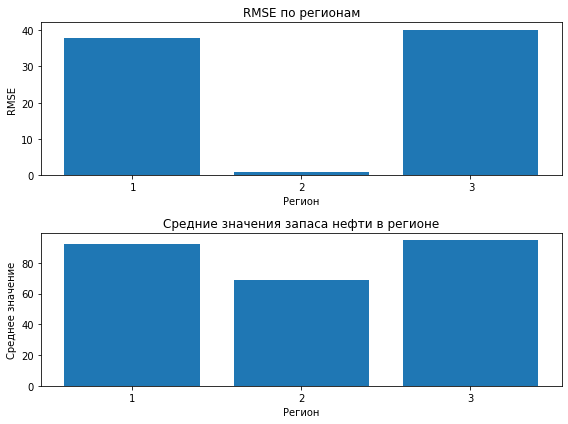

In [24]:
# Немного визуализации
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))

# Бар-плот RMSE
ax1.bar(range(len(rmses)), rmses)
ax1.set_title('RMSE по регионам')
ax1.set_xlabel('Регион')
ax1.set_ylabel('RMSE')
ax1.set_xticks(range(len(rmses)))
ax1.set_xticklabels([f' {i+1}' for i in range(len(rmses))])

# Бар-плот средних значений
ax2.bar(range(len(means)), means)
ax2.set_title('Средние значения запаса нефти в регионе')
ax2.set_xlabel('Регион')
ax2.set_ylabel('Среднее значение')
ax2.set_xticks(range(len(means)))
ax2.set_xticklabels([f'{i+1}' for i in range(len(means))])

plt.tight_layout()
plt.show()

Вывод после обучения:
Средний запас сырья у второго региона существенно ниже чем у первого и третьего. Но у этих регионов среднее отклонение прогнозных значений от фактических (RMSE-метрика) слишком высокая, что говорит о том, что точность предсказаний низкая. А вот у второго региона как раз, наоборот, вероятность ошибки совсем небольшая.

## Подготовка к расчёту прибыли

Посчитаем достаточный объём сырья для безубыточной разработки новой скважины. Известно, что один баррель сырья приносит 450 рублей дохода. Соответственно, доход с тысячи баррелей равен 450 000 рублей. Бюджет на разработку новых скважин в регионе — 10 млрд рублей. В одном регионе одновременно разрабатывается 200 новых скважин.

Зададим константы согласно условию задачи:

In [25]:
EXPLORE = 500 # количество точек
MINING = 200 # Количество лучших из общего числа согласно прогнозированию
BANK = 10000000000 #Бюджет
REVENUE_PER_BARREL = 450000 # Доход с тысячи барелей
LOSS_PROBABILITY = 0.025 # Вероятность убытков
BOOTSTRAP_NUMBER = 1000 # Количество выборок

In [26]:
well_budget = BANK / MINING
print('Бюджет доступный на разработку одной скважины в регионе:', well_budget, 'рублей')

Бюджет доступный на разработку одной скважины в регионе: 50000000.0 рублей


In [34]:
product_threshold = well_budget / REVENUE_PER_BARREL
print('Минимальный достаточный объём запасов нефти для разработки нового месторождения:', round(product_threshold, 1), 'тысяч баррелей')

Минимальный достаточный объём запасов нефти для разработки нового месторождения: 111.1 тысяч баррелей


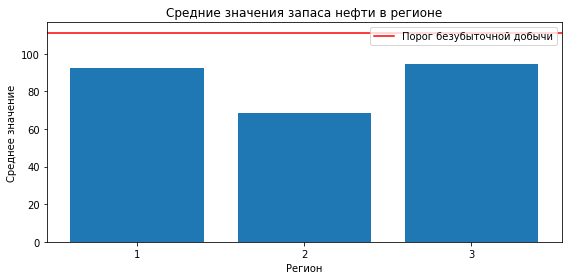

In [28]:
# Немного визуализации
fig, ax2 = plt.subplots(figsize=(8, 4))

# Бар-плот средних значений
ax2.bar(range(len(means)), means)
ax2.axhline(y=product_threshold, color='r', linestyle='-', label='Порог безубыточной добычи') 
ax2.legend()  # Добавляем легенду
ax2.set_title('Средние значения запаса нефти в регионе')
ax2.set_xlabel('Регион')
ax2.set_ylabel('Среднее значение')
ax2.set_xticks(range(len(means)))
ax2.set_xticklabels([f'{i+1}' for i in range(len(means))])

plt.tight_layout()
plt.show()

Вывод по подготовки к расчету прибыли:

Был расчитан пороговый уровень объёма запасов в одной скважине, при котором разработка этой скважины становится экономически оправданной (прибыль покрывает все затраты на разработку). Видно, что во всех трёх регионах средние предсказанные запасы меньше, чем пороговое значение объёмов, при котором разработка новой скважины экономически эффективна. А значит, необходимо тщательно отобрать скважины с наибольшими объёмами и меньшими рисками.

## Расчёт прибыли и рисков 

In [29]:
def total_income(valid_target, pred_valid,count): #Расчитаем доход
    top_mining = pred_valid.sort_values(ascending=False) #Сортируем лучшие точки
    target_choice = valid_target[top_mining.index][:count] #Отбираем лучшие
    income = (target_choice.sum() * REVENUE_PER_BARREL) - BANK # Вычисляем доход
    return income

In [30]:
def income_risks (valid_target, pred_valid,  bootstrap_samples, EXPLORE): #Расчет вероятности убытков
    state = np.random.RandomState(12345)
    values = []
    
    for i in range(bootstrap_samples): #Бутстрэпим
        target_subsample = valid_target.reset_index(drop=True).sample(EXPLORE, replace=True, random_state=state)
        probs_subsample = pred_valid[target_subsample.index]
        rev = total_income(target_subsample, probs_subsample, MINING)
        values.append(rev) #Добавляем

    values = pd.Series(values) #Преобразуем
#считаем квантили
    lower = values.quantile(0.025) #считаем квантили
    upper = values.quantile(0.975) 
    mean = values.mean()
#вычисляем вероятность убытков
    risks = len(values[values < 0])/len(values)*100
#выводим
    print("Средняя выручка:", mean)
    print("95%-квантиль выручки:", upper)
    print("5%-квантиль выручки:", lower)
    print("Вероятность убытков:", risks,"%")

Считаем для первого региона:

In [31]:
income_risks(valid_target_1, pred_valid_1,  BOOTSTRAP_NUMBER, EXPLORE)

Средняя выручка: 435933772.1386621
95%-квантиль выручки: 966504180.707376
5%-квантиль выручки: -116231612.77720818
Вероятность убытков: 6.1 %


Считаем для второго региона:

In [32]:
income_risks(valid_target_2, pred_valid_2,  BOOTSTRAP_NUMBER, EXPLORE)

Средняя выручка: 489661254.41175246
95%-квантиль выручки: 905762650.4248402
5%-квантиль выручки: 55116177.27361494
Вероятность убытков: 1.0999999999999999 %


Считаем для третьего региона:

In [33]:
income_risks(valid_target_3, pred_valid_3,  BOOTSTRAP_NUMBER, EXPLORE)

Средняя выручка: 403687927.86213845
95%-квантиль выручки: 952887416.7078604
5%-квантиль выручки: -153116984.7619049
Вероятность убытков: 7.1 %


Вывод по расчету прибыли:
Несмотря на то, что у второго региона предсказания сырья оказались ниже остальных, этот регион лидирует по выручке и веротяности убытков (кроме того, он попадает в заданный диапазон по этому параметру в 2,5%).
Наиболее лучшим регионом исходя из расчета выручки является - второй. При этом только в данном регионе вероятность убытков равна 1.1% и лежит в допустимом значении (Максимальное - 2.5%).

## Итоговый вывод:

В исследования были проделаны следующие шаги:
  - были загружены и импортированы необходимые библиотеки;
  - данные были осмотрены, предобработка не потребовалась;
  - был расчитан предел безубыточной добычи в регионе, произведено сранение с имеющимися в регионах средними запасами;
  - Данные были подготовлены и разбиты на выборки(обучающие и валидационные);
  - была построена и обучена модель линейной регрессии и на основе неё получены предсказания по среднему запасу сырья в каждом регионе нефтедобычи, также были подсчитаны метрики RMSE по каждому региону;
  - Была написана функция для расчета прибыли, после чего данная функция была применена к каждому региону, и получены расчеты, а также вычислены вероятности убытков;
  
По итогам исследования, установлено, что под параметры указанные в задании, для разработки нефтедобычи подходит второй регион нефтедобычи. В нём рассчитанная прибыль наибольшая, а вероятность убытков наименьшая и укладывается в допустимые значения.